# Importing Necessary Library

In [251]:
# Numerical and Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra - To Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [252]:
df = pd.read_csv('titanic_dataset.csv')
df.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [253]:
df.shape

(891, 12)

In [254]:
#SibSp -> Siblings + Spouse
#Parch -> Parent + Child
#Embarked -> Boarding station

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Value Check

In [256]:
# Percentage of missing values
# Identification of missing values
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [257]:
# Cabin -> Very high % of missing -> Exclude the column from the analysis(Usually anything above 40%)
# Age -> Medium % of missing -> Impute with mean/median/mode
# Embarked -> Very low % od missing -> Imputation or exclude rows with missing values

In [258]:
df1=df.drop('Cabin', axis=1)

In [259]:
#if mean and median are very far from each other use median, but if mean or median are close to each other use mean/median
df1['Age'].mean(), df1['Age'].median()

(29.69911764705882, 28.0)

In [260]:
# Imputing or replacing missing values of age column with median of age column (Numerical Data)
med = df['Age'].median()
df1['Age'] = df1['Age'].fillna(med)

In [261]:
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [262]:
# Excluding rows where embarked values is missing
df2=df1[df['Embarked'].notna()]
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [263]:
100*df2.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [264]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [265]:
num_cols=["Age","Fare"] 
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"] 
extra_cols=["PassengerId","Name","Ticket"] 
len(num_cols)+len(cat_cols)+len(extra_cols)

11

In [266]:
df2.shape

(889, 11)

# Univariate Analysis


### Categorical

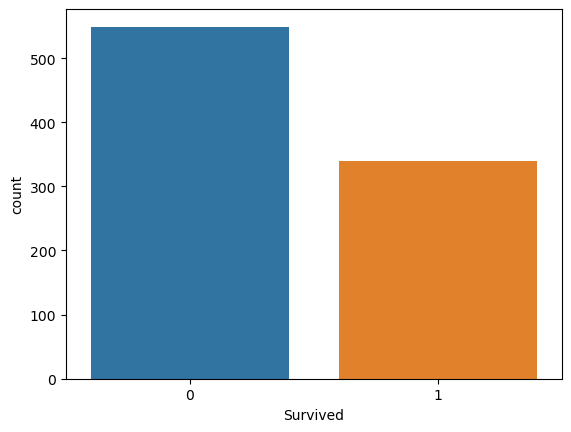

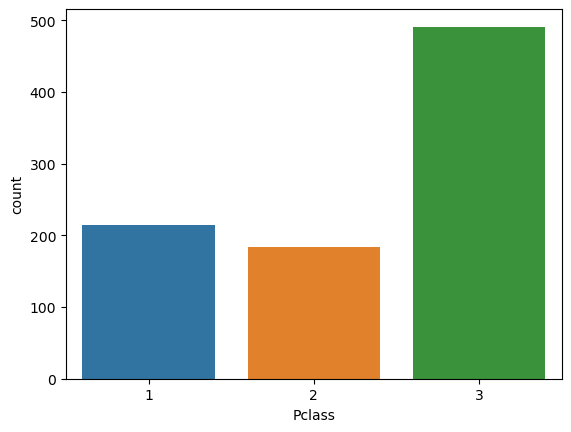

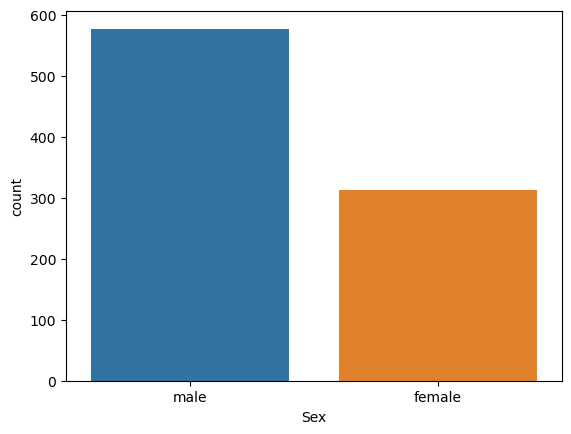

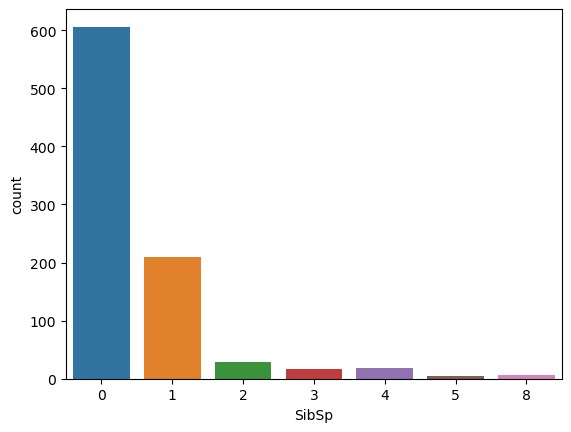

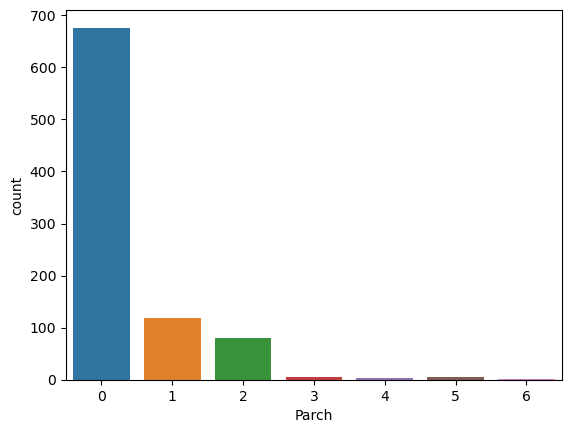

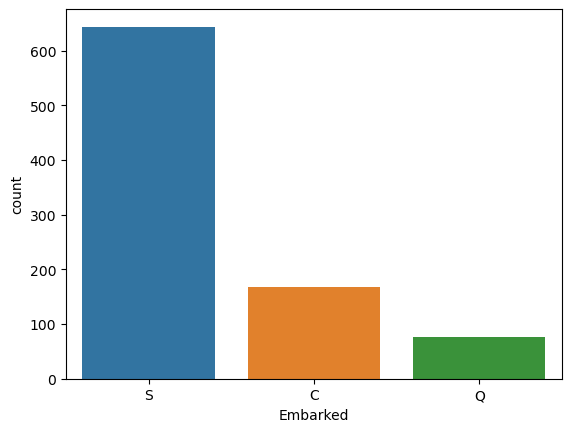

In [267]:
for col in cat_cols:
    sns.countplot(x=df2[col])
    plt.show()

### Numerical

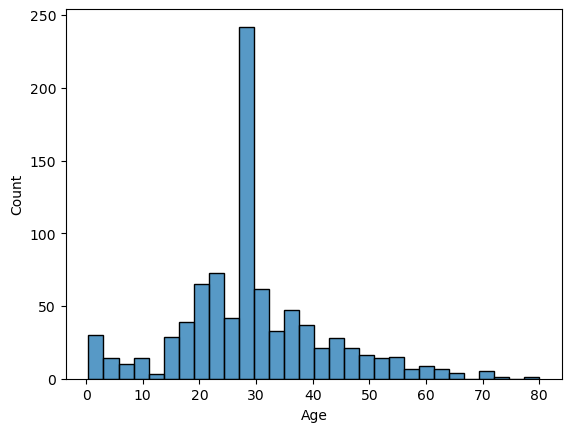

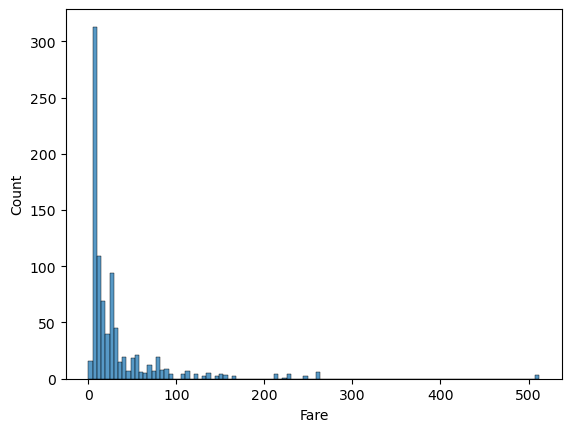

In [268]:
for col in num_cols:
    sns.histplot(x=df2[col])
    plt.show()

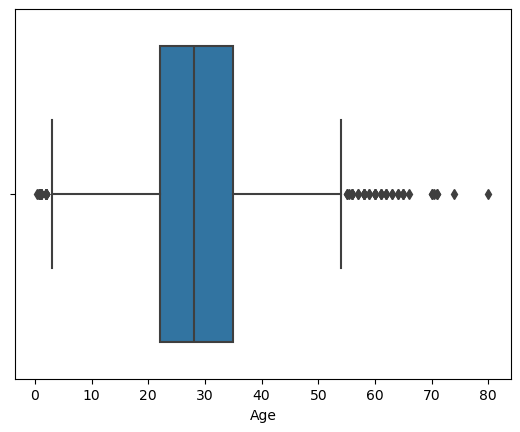

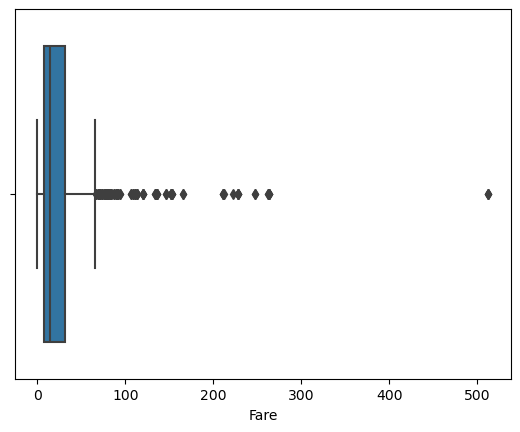

In [269]:
for col in num_cols:
    sns.boxplot(x=df2[col])
    plt.show()

# Upper Whisker: Q3+1.5*(Q3-Q1)
# Lower Whisker: Q1-1.5*(Q3-Q1)

# Bivariate Analysis

### Numerical vs Numerical

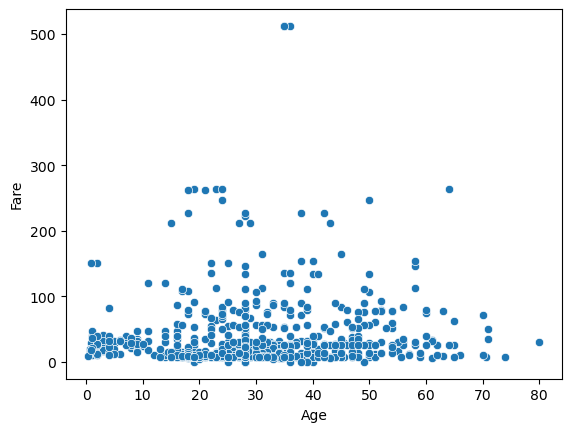

In [270]:
# use scatterplot to find relation between 2 numerical values
sns.scatterplot(x=df2['Age'], y=df2['Fare'])
plt.show()

In [271]:
# Positive relationship -> If x1 is increasing x2 is also increasing
# Negative relationship -> If x1 is increasing x2 is decreasing
# No relationship -> If x1 and x2 have no relationship

# Here we see so relation between age and fare

### Numerical vs Categorical

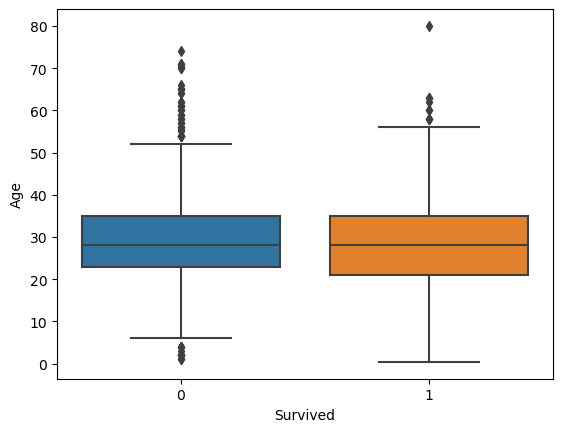

In [272]:
sns.boxplot(x=df2['Survived'], y=df2['Age'])
plt.show()

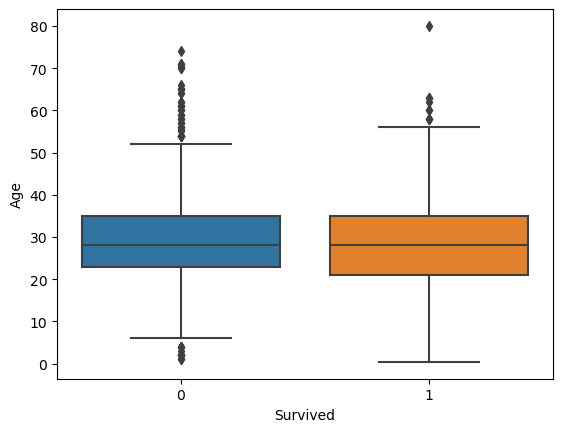

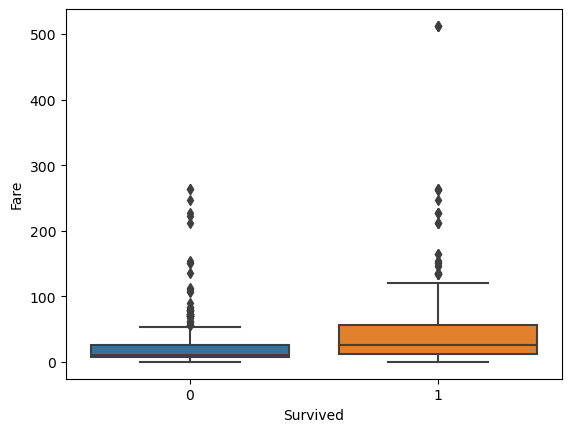

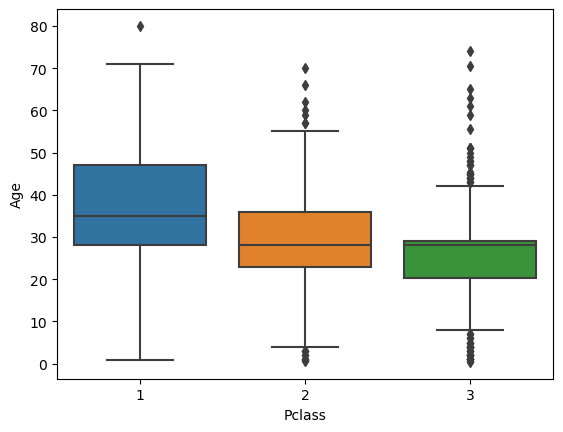

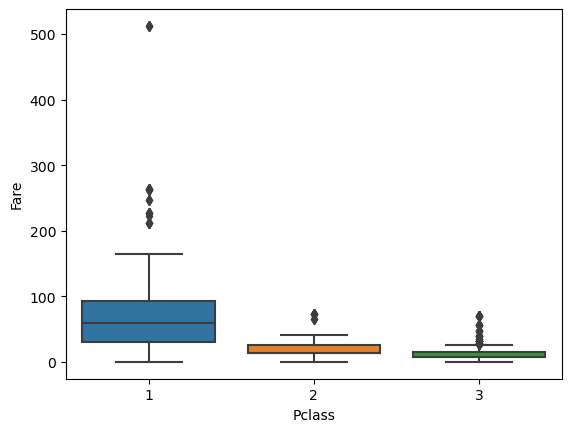

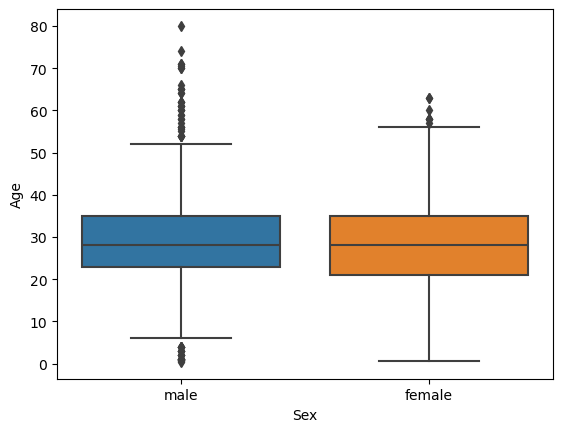

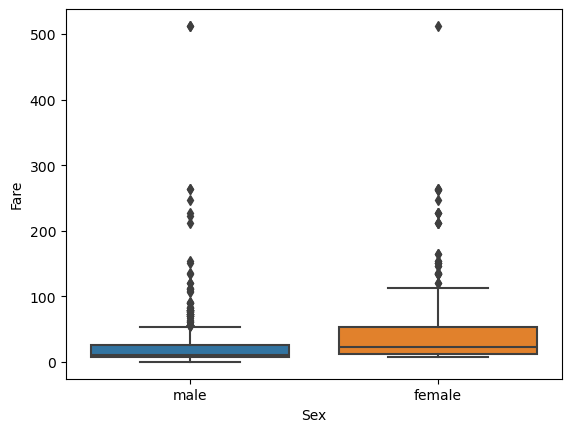

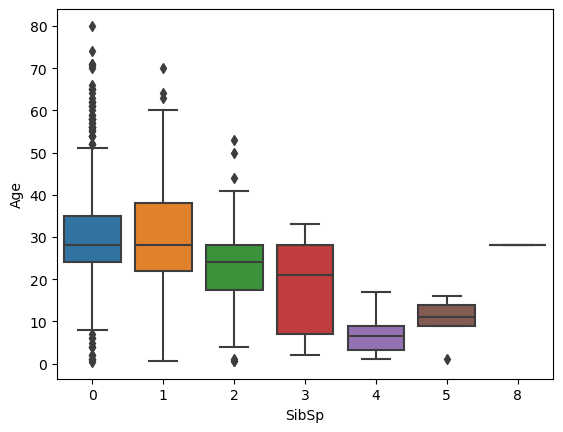

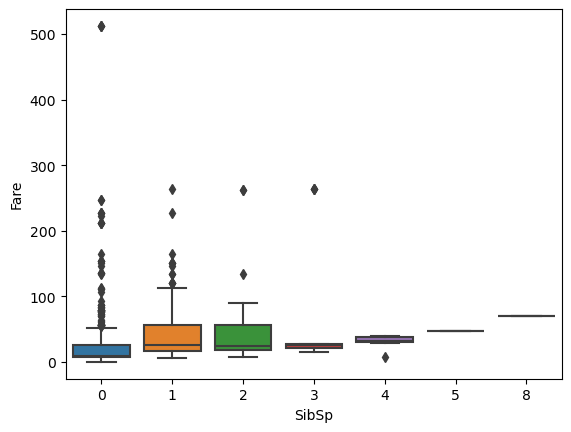

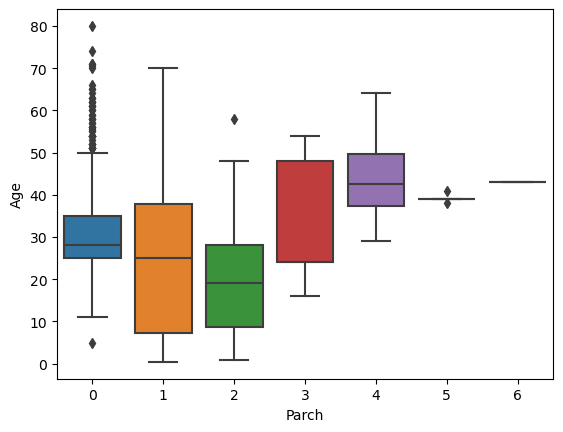

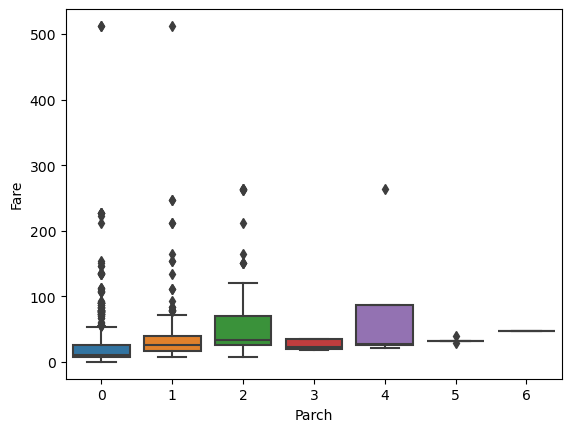

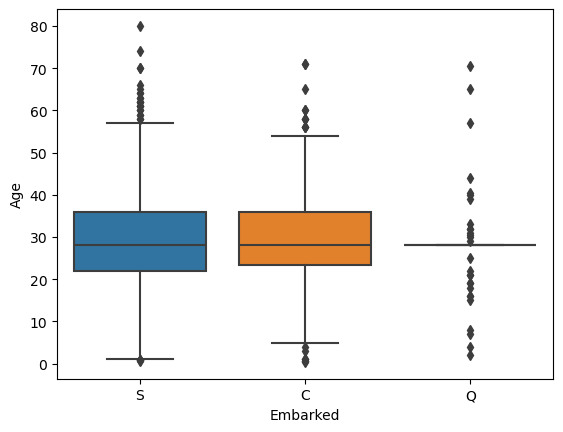

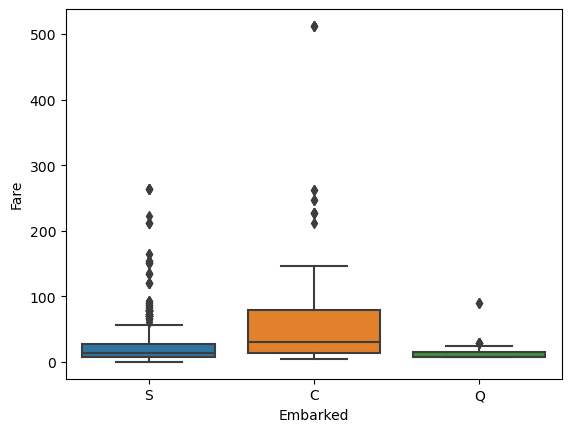

In [273]:
# doing it for all combinations
for col1 in cat_cols:
    for col2 in num_cols:
        sns.boxplot(x=df2[col1], y=df2[col2])
        plt.show()

# Multivariate analysis

In [274]:
cor= df2[num_cols].corr()

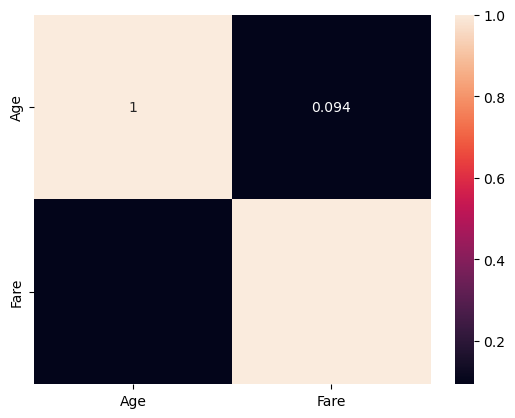

In [275]:
sns.heatmap(cor, annot=True)
plt.show()

In [276]:
## Correlation represents strength of relationship between variables 
## Correlation lies in the range of -1 to 1 
## Negative correlation (0 to -1) shows inverse relationship 
## Positive correlation (0 to 1) shows direct relationship 
## 0 correlation represents no relationship.


In [277]:
# Cat vs Cat (Bivariate)
cat_cols
dfnew = df2.copy()
dfnew['Sex'] = dfnew['Sex'].map({'male': 0, 'female': 1})
dfnew['Embarked'] = dfnew['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [281]:
cor2 = df2[cat_cols].corr(numeric_only=True)
cor2

,Survived,Pclass,SibSp,Parch
Survived,1.000000,-0.335549,-0.034040,0.083151
Pclass,-0.335549,1.000000,0.081656,0.016824
SibSp,-0.034040,0.081656,1.000000,0.414542
Parch,0.083151,0.016824,0.414542,1.000000


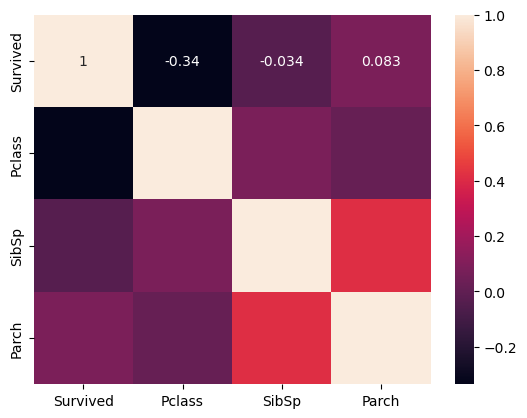

In [282]:
sns.heatmap(df2[cat_cols].corr(numeric_only=True), annot=True)
plt.show()

In [283]:
sns.version_

AttributeError: module 'seaborn' has no attribute 'version_'